In [10]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
from scipy.signal import find_peaks

In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = io.imread('../doc/CHCl_CA_DES_5_31_19.tiff')

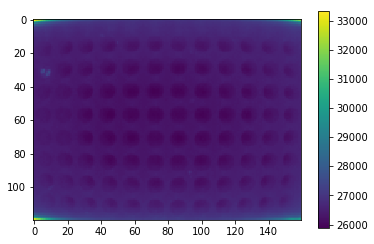

In [4]:
plt.imshow(frames[1])
plt.colorbar()

### Adding all the images in the frame to get a better contrast and reduce noise

In [5]:
for II in range(frames.shape[0]):
    frame = frames[II]
    img_eq = (frame - np.amin(frame))/(np.amax(frame)-np.amin(frame))
    if II == 0:
        img_ave = img_eq
    else:
        img_ave = img_ave + img_eq
img_average = img_ave/frames.shape[0]
img_eq = (img_ave - np.amin(img_ave))/(np.amax(img_ave)-np.amin(img_ave))

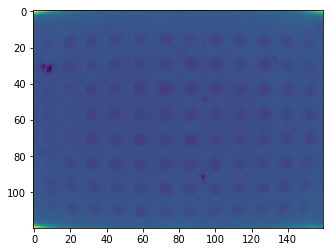

In [6]:
plt.imshow(img_eq)

In [7]:
rows = img_eq.shape[0]
columns = img_eq.shape[1]

In [8]:
column_sum = []
for i in range(0,columns):
    column_sum.append(sum(img_eq[:,i]))
row_sum = []
for j in range(0,rows):
    row_sum.append(sum(img_eq[j,:]))

In [9]:
column_sum = [x * -1 for x in column_sum]
row_sum = [x * -1 for x in row_sum]

In [12]:
column_troughs = find_peaks(column_sum,distance=10)
column_troughs = column_troughs[0]
row_troughs = find_peaks(row_sum,distance=10)
row_troughs = row_troughs[0]

In [13]:
X = []
Y = []
i = 0
j = 0
for i in range(0,8):
    for j in range(0,12):
        X.append(column_troughs[j])
        j = j + 1
        Y.append(row_troughs[i])
    i = i + 1

In [18]:
well_location = pd.DataFrame(list(zip(X, Y)),columns =['X', 'Y'])

In [50]:
# To easily access the X and Y coordinates
x = well_location['X']
y = well_location['Y']
well_location

,X,Y
0,9,17
1,21,17
2,32,17
3,45,17
4,59,17
5,73,17
6,87,17
7,100,17
8,114,17
9,127,17


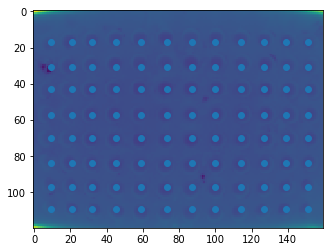

In [103]:
plt.imshow(img_eq)
plt.scatter(x,y)

### Finding pixel intensity in all the wells in each frame

In [83]:
# List to store lists of temperature at all the well in each frame.
temp = []
for i in range(96):
    # List to store temperature at a well in each frame.
    comp_temp = []
    for frame in frames:
        comp_temp.append(frame[y[i]][x[i]])
    temp.append(comp_temp)

In [85]:
# Temperature at each of 96 well plates can be accessed
# using the well plate number as the list index
len(temp)
# The length of the list gives the number of wells at which
# temperature is observed over a period of time.

96

In [87]:
# Each list in the list 'temp' gives the temperature
# at the required well in each frame
len(temp[1])

6668

### Plotting

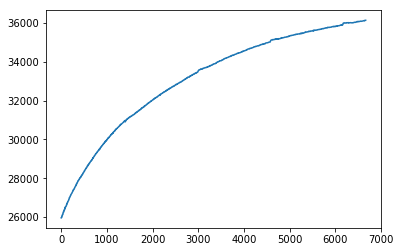

In [96]:
plt.plot(temp[55])